# Практика
Неявка на прием к врачу — серьезная проблема в сфере общественного здравоохранения. Пропущенные приемы обходятся системе здравоохранения в США почти в [200 долларов каждый](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4714455/). Поэтому неудивительно, что снижение количества неявок стало приоритетом в Соединенных Штатах и во всем мире. Были проведены [многочисленные исследования](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3962267/) с целью определения наиболее эффективных средств снижения показателей невыхода на работу. Первым шагом к решению проблемы является понимание того, почему пациент пропускает запланированное посещение.

[Данные](https://drive.google.com/open?id=1bvlBkt0AYFw6ZLSjB41xHLnCLkweXxXE), 

Описание данных можно найти на [Kaggle](https://www.kaggle.com/joniarroba/noshowappointments)

Мы хотим ответить по существу на два вопроса:


1.   Каков портрет человека, пропускающего запланированные визиты к врачу?
2.   Какие факторы влияют на неявку?

Держите это в голове. Свои ответы сопровождайте графиками, не забывайте подписывать оси, и заголовки, а также выбирайте не тот тип визуализации, который вы поняли как работает, а тот, который подходит именно для задачи.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import seaborn as sns

In [ ]:
df = pd.read_csv('KaggleV2-May-2016.csv')

#### Задание 0
Приведите колонку no-show к колонке show, чтобы убрать двойное отрицание

In [ ]:
df.replace({'No-show': {'No': 'Yes','Yes': 'No'}}, inplace=True)
df.rename({'No-show': 'show'}, axis='columns', inplace=True)

#### Задание 1
Проверьте данные на пропуски и выбросы

In [ ]:
df.info()# Пропусков нет
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  show            110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


-1         1
 0      3539
 1      2273
 2      1618
 3      1513
        ... 
 98        6
 99        1
 100       4
 102       2
 115       5
Name: Age, Length: 104, dtype: int64

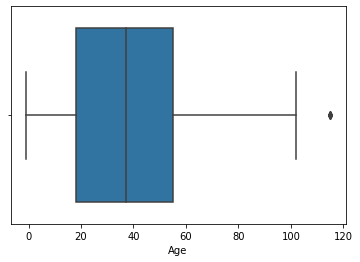

In [ ]:
sns.boxplot(df['Age'])
df['Age'].value_counts().sort_index()# 115 думаю не выброс

In [ ]:
df['Handcap'].value_counts()# в описании данных написано что эта колонка T/F только, а тут есть значения : {2,3,4}

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

#### Задание 2
Приведите колонки к правильным типам данных (по крайней мере временные)

In [ ]:
df = df.astype({'ScheduledDay': 'Datetime64',
           'AppointmentDay': 'Datetime64',
           'PatientId': 'int64',
           'Age': 'int8',
           'Scholarship': 'int8',
           'Hipertension': 'int8',
           'Diabetes': 'int8',
           'Alcoholism': 'int8',
           'Handcap': 'int8',
           'SMS_received': 'int8'})

#### Задание 3
Проверьте диапазоны значений возраста (Age)

Есть ли записи, которые кажутся вам подозрительными?
Стоит ли эти записи оставить или стоит убрать? Почему вы так думаете (в решении этого вопроса может помочь описание данных на сайте kaggle)?

In [ ]:
df[df['PatientId'] == df[df['Age'] == -1]['PatientId'].values[0]]# возраст "-1", посмотрим на все посещения 
#пациент с даным  Id. я не смог найти подсказку в описании данных на kaggle

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,show
99832,465943158731293,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,Yes


#### Задание 4
Уникальные ли пациенты в нашей таблице? Мы имеем дело со списком разовых приемов или по крайней мере часть из них регулярные?

In [ ]:
df['PatientId'].value_counts() #есть пациенты, которые приходили до 80 раз

822145925426128    88
99637671331        84
26886125921145     70
33534783483176     65
6264198675331      62
                   ..
2886912523138       1
68129842443312      1
99264711372         1
2212945531847       1
57863365759569      1
Name: PatientId, Length: 62299, dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)#удалим дубликаты
df['AppointmentID'].nunique()#Все айди записей различны

110527

In [ ]:
df_pat_sch = df[['PatientId', 'ScheduledDay']]
df_pat_sch.duplicated().sum()#Записей дублирующихся по клиенту в одно и тоже время

1334

In [ ]:
df_dup = df[df_pat_sch.duplicated(keep=False)]#рассмотрим дублирующие записи
df_dup.groupby(['PatientId', 'ScheduledDay']).nunique()['show'].value_counts()#есть записи где "show" различны 

1    1246
2      29
Name: show, dtype: int64

In [ ]:
ind_dup = df_dup[df_dup[['PatientId', 'ScheduledDay', 'show']].duplicated()].index #получим индексы дублирующих записей
#где "show" не меняется

In [ ]:
ind_dup_2 = df_dup[~df_dup[['PatientId', 'ScheduledDay', 'show']].duplicated(keep=False)].index#получим индексы
#всех записей дубликатов по 'PatientId', 'ScheduledDay' c раздичными 'show'

In [ ]:
df.drop(ind_dup, inplace=True)
df.drop(ind_dup_2, inplace=True)

#### Задание 5
Если у нас имеются неоднократные посещения, влияет ли как-то номер (1-ый 2-ой 3-ий...) приёма на явку? Где прогулы происходят чаще, для регулярных посещений или для разовых? В решении этого задания вам может помочь функция [.rank()](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.core.groupby.GroupBy.rank.html) 

[stackoverflow](https://stackoverflow.com/questions/33899369/ranking-order-per-group-in-pandas)

Можно ли уверенно говорить о шансе посещения для больших номеров?

In [ ]:
df['rank'] = df.groupby(['PatientId'])['ScheduledDay'].rank()

In [ ]:
df['show_bool'] = df['show'].apply(lambda x: x == 'Yes')

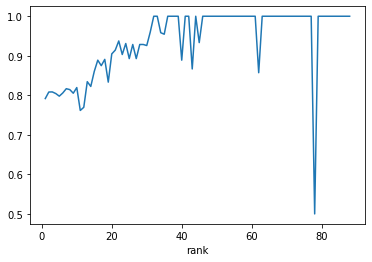

In [ ]:
df.groupby('rank')['show_bool'].mean().plot()
#

In [ ]:
grouped_rank = df.groupby('rank')['show_bool'].agg(['mean', 'count'])
grouped_rank['ratio'] = grouped_rank['count'] / grouped_rank['count'].sum()
grouped_rank['cum_sum'] = grouped_rank['ratio'].cumsum() 
grouped_rank

,mean,count,ratio,cum_sum
rank,,,,
1.0,0.791787,62292,0.570622,0.570622
2.0,0.808321,24061,0.220409,0.791032
3.0,0.808594,10193,0.093372,0.884404
4.0,0.804448,4766,0.043659,0.928063
5.0,0.797859,2429,0.022251,0.950314
...,...,...,...,...
84.0,1.000000,2,0.000018,0.999963
85.0,1.000000,1,0.000009,0.999973
86.0,1.000000,1,0.000009,0.999982


In [ ]:
df[df['rank'] > 45]['show_bool'].describe()

count      238
unique       2
top       True
freq       236
Name: show_bool, dtype: object

In [ ]:
df[df['rank'] > 31]['show_bool'].describe()

count      511
unique       2
top       True
freq       502
Name: show_bool, dtype: object

#### Задание 6
Исследуйте влияние возраста на явку. Удобно использовать функцию [pd.cut](https://stackoverflow.com/questions/45751390/pandas-how-to-use-pd-cut) для создания интервалов. 

In [ ]:
df['Age_cut'] = pd.cut(df['Age'], [-1, 12, 18, 28, 44, 116], labels = ['chil','young men', 'stud', 'adul', 'old'], )

In [ ]:
age_cut_show = df.groupby('Age_cut')['show_bool'].mean()
age_cut_show

Age_cut
chil         0.796803
young men    0.740712
stud         0.752490
adul         0.783462
old          0.835109
Name: show_bool, dtype: float64

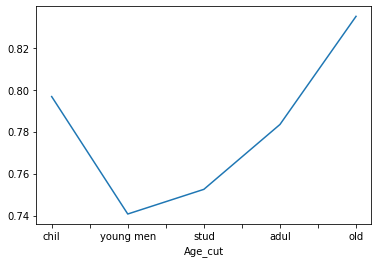

In [ ]:
age_cut_show.plot()

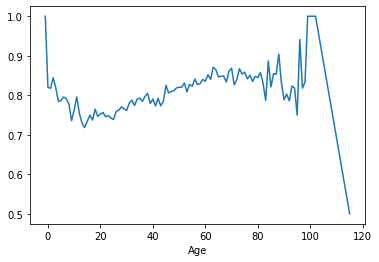

In [ ]:
df.groupby('Age')['show_bool'].mean().plot()

#### Задание 7
К разбивке по возрастам, добавьте разбивку по полу. Может быть один пол прогуливает приемы чаще другого? Во всех ли возрастных группах мы можем уверенно сравнивать шанс пропуска (иными словами, нет ли в какой-нибудь из групп перекоса в сторону мужчин или женщин по кол-ву записей о приемах)?

In [ ]:
pd.crosstab(df['Age_cut'], df['Gender'],values=df['show_bool'], aggfunc={np.mean})

mean          
Gender            F         M
Age_cut                      
chil       0.796999  0.796624
young men  0.746244  0.731333
stud       0.751171  0.756138
adul       0.781757  0.787625
old        0.832628  0.840340

In [ ]:
pd.crosstab(df['Age_cut'], df['Gender'],values=df['show_bool'], aggfunc = len, margins=True, normalize=True)

Gender,F,M,All
Age_cut,,,
chil,0.090977,0.099864,0.190841
young men,0.044513,0.026255,0.070768
stud,0.091893,0.033208,0.125102
adul,0.149644,0.061296,0.210940
old,0.272905,0.129444,0.402349
All,0.649933,0.350067,1.000000


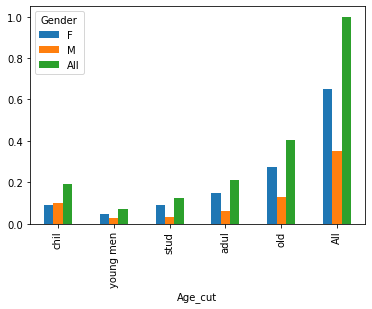

In [ ]:
pd.crosstab(df['Age_cut'], df['Gender'],values=df['show_bool'], aggfunc = len, margins=True, normalize=True).plot(kind='bar')

#### Задание 8
Исследуйте влияние времени ожидания приёма на явку. Можно воспользоваться тем же подходом, что и в задании 5.

In [ ]:
df['days_wait'] = df.apply(lambda x: (x['AppointmentDay'].date() - x['ScheduledDay'].date()).days, axis=1)

In [ ]:
df.drop(df[df['days_wait'] < 0].index, inplace=True) # удалим записи где время ожидание отрицательное, во всех
#случая show = false 

In [ ]:
df_wait = df.groupby('days_wait')['show_bool'].agg({'mean', 'count'})

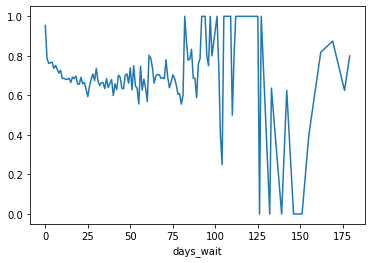

In [ ]:
df_wait['mean'].plot()

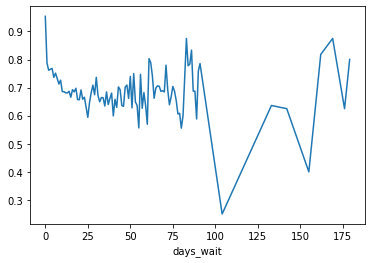

In [ ]:
df_wait[df_wait['count'] > 5]['mean'].plot()

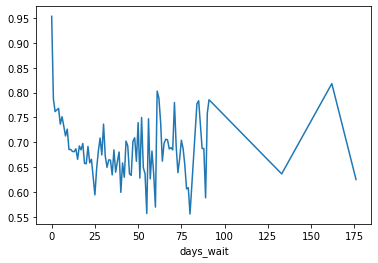

In [ ]:
df_wait[df_wait['count'] > 10]['mean'].plot()

In [ ]:
df['days_wait_cat'] = pd.cut(df['days_wait'], [-1, 0, 3, 7, 30, 180], labels=['0', '1-3', '4-7', '8-30', '31>'])

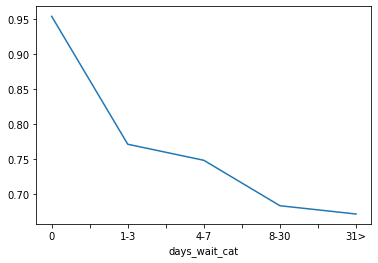

In [ ]:
df.groupby('days_wait_cat')['show_bool'].mean().plot()

#### Задание 9
В общем по выборке влияет ли СМС на явку?

In [ ]:
df_sms_agg = df.groupby('SMS_received')['show_bool'].agg({'mean', 'count'})
df_sms_agg

,mean,count
SMS_received,,
0,0.835863,73914
1,0.724451,35246


#### Задание 10
Исследуйте влияние отправки СМС на явку среди прогульщиков. Прогульщиком назовем тех, кто хотя бы раз пропускал прием.

Верны ли эти выводы для тех пациентов у которых было более 1-ой записи (>=5 записей)?

Для пациентов с количеством записей >= 5 посчитайте корреляцию между sms_received и show для каждого пациента, и отобразите их на гистограмме. В какую сторону смещена гистограмма, о чем это говорит?

In [ ]:
df_pat = df.groupby('PatientId')['show_bool'].agg({'count', 'all'})
df_pat_noshow = df[df['PatientId'].isin(df_pat[~df_pat['all']].index)] #записи с пациентами которые хотя бы раз прогуливали

In [ ]:
df_pat_noshow.groupby('SMS_received')['show_bool'].agg({'count','mean'})

,mean,count
SMS_received,,
0,0.547060,26785
1,0.370577,15430


In [ ]:
df_pat_noshow_2 = df[df['PatientId'].isin(df_pat[(df_pat['count'] > 1) & (df_pat['all'] == False)].index)]
#запипи с пациентами которые хоть раз прогуливали и записывались более одного раза

In [ ]:
df_pat_noshow_2.groupby('SMS_received')['show_bool'].agg({'count','mean'})

,mean,count
SMS_received,,
0,0.640149,22890
1,0.472640,12098


In [ ]:
df_pat_noshow_3 = df[df['PatientId'].isin(df_pat[(df_pat['count'] > 4) & (df_pat['all'] == False)].index)]
#записи с пациентыами которые хоть раз прогуливали и записывались более 4ех раз

In [ ]:
df_pat_noshow_3.groupby('SMS_received')['show_bool'].agg({'count','mean'})

,mean,count
SMS_received,,
0,0.749281,8691
1,0.624791,3590


In [ ]:
def cor_pat(x):
  return x['SMS_received'].corr(x['show_bool'])
cor_sms_show = df_pat_noshow_3.groupby('PatientId').apply(cor_pat).dropna()

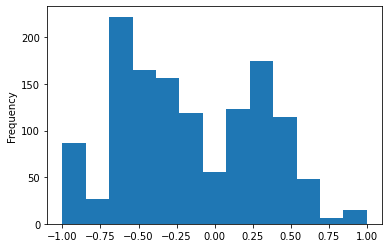

In [ ]:
cor_sms_show.plot(kind='hist', bins=13 )

#### Задание 11
Проанализируйте еще какой-нибудь возможный фактор, влияющий на явку. Можно попробовать совместить несколько уже рассмотренных признаков, и посмотреть на более узкие группы людей

In [ ]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,rank,days_wait
count,1.091600e+05,1.091600e+05,109160.000000,109160.000000,109160.000000,109160.000000,109160.000000,109160.000000,109160.000000,109160.000000,109160.000000
mean,1.475240e+14,5.675765e+06,37.096803,0.098232,0.197398,0.071867,0.030497,0.022188,0.322884,2.242195,10.063512
std,2.560832e+14,7.116418e+04,23.141074,0.297629,0.398037,0.258269,0.171950,0.161078,0.467581,3.914039,15.199830
min,3.921700e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,4.176731e+12,5.640757e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,3.172723e+13,5.680922e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
75%,9.439981e+13,5.725977e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,14.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,88.000000,179.000000


In [ ]:
df['disease'] = df.apply(lambda x: x['Hipertension'] + x['Diabetes'] + x['Alcoholism'], axis=1)

In [ ]:
df.groupby('disease')['show_bool'].agg({'mean','count'})

,mean,count
disease,,
0,0.792753,84228
1,0.824108,17397
2,0.823901,7280
3,0.819608,255


In [ ]:
df.groupby(['Scholarship','Age_cut'])['show_bool'].agg({'mean', 'count'}).unstack(level=0)

mean            count      
Scholarship         0         1      0     1
Age_cut                                     
chil         0.798838  0.778368  18761  2071
young men    0.743026  0.727192   6596  1129
stud         0.757355  0.714653  12100  1556
adul         0.788050  0.758524  19448  3578
old          0.836556  0.809962  41531  2389

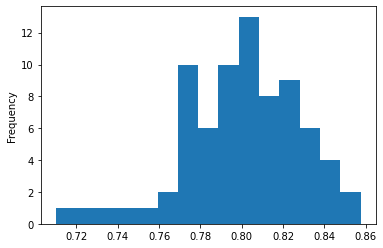

In [ ]:
pat_neigh = df.groupby(['Neighbourhood'])['PatientId'].nunique() #пациентов в районе
ind_neigh = pat_neigh[pat_neigh.sort_values() > 50].index # районы с более 50ю пациентами
neigh_agg = df[df['Neighbourhood'].isin(ind_neigh)].groupby('Neighbourhood')['show_bool'].agg({'mean', 'count'})
neigh_agg['mean'].plot(kind='hist', bins = 15)

In [ ]:
neigh_agg['k'] = neigh_agg['mean'] * neigh_agg['count']
neigh_agg.sort_values('k', ascending=False).head(10)

,mean,count,k
Neighbourhood,,,
JARDIM CAMBURI,0.813449,7510,6109.0
MARIA ORTIZ,0.789972,5804,4585.0
RESISTÊNCIA,0.803161,4303,3456.0
JARDIM DA PENHA,0.837035,3872,3241.0
CENTRO,0.790470,3274,2588.0
SANTA MARTHA,0.844597,3063,2587.0
TABUAZEIRO,0.818885,3103,2541.0
ITARARÉ,0.745817,3407,2541.0
SANTO ANTÔNIO,0.827029,2723,2252.0


In [ ]:
df_pat_show_only = df[df['PatientId'].isin(df_pat[df_pat['all']].index)]#записи с пациентами которые не прогуливали
neigh_with_only_show = df_pat_show_only.groupby('Neighbourhood')['PatientId'].nunique()# таких пациентов в каждом районе
neigh_with_only_show.name = 'show_only'

In [ ]:
neigh_with_only_show = neigh_with_only_show.append(pd.Series([neigh_with_only_show.sum()], index=['all']))
#добавим строчку с суммой всех пациетнов
neigh_with_only_show

AEROPORTO                  6
ANDORINHAS               765
ANTÔNIO HONÓRIO          135
ARIOVALDO FAVALESSA      129
BARRO VERMELHO           148
                       ...  
SÃO PEDRO                938
TABUAZEIRO              1393
UNIVERSITÁRIO             69
VILA RUBIM               420
all                    44650
Length: 81, dtype: int64

In [ ]:
neigh_with_noshow = df_pat_noshow.groupby('Neighbourhood')['PatientId'].nunique()# пациентов которые прогуливали в районе
neigh_with_noshow.name = 'with_noshow'
neigh_with_noshow = neigh_with_noshow.append(pd.Series([neigh_with_noshow.sum()], index=['all']))#добавим строку с суммой всех пациентов
neigh_with_noshow

AEROPORTO                  1
ANDORINHAS               368
ANTÔNIO HONÓRIO           40
ARIOVALDO FAVALESSA       52
BARRO VERMELHO            68
                       ...  
SÃO PEDRO                406
TABUAZEIRO               463
UNIVERSITÁRIO             24
VILA RUBIM               117
all                    17642
Length: 81, dtype: int64

In [ ]:
set(neigh_with_only_show.index) - set(neigh_with_noshow.index)

{'PARQUE INDUSTRIAL'}

In [ ]:
df[df['Neighbourhood'] == 'PARQUE INDUSTRIAL']

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,show,rank,show_bool,Age_cut,days_wait,days_wait_cat,disease
75199,8255992453538,5663947,F,2016-05-05 10:48:59,2016-05-05,17,PARQUE INDUSTRIAL,0,0,0,0,0,0,Yes,1.0,True,young men,0,0,0


In [ ]:
set(neigh_with_noshow.index) - set(neigh_with_only_show.index)

{'ILHAS OCEÂNICAS DE TRINDADE'}

In [ ]:
df[df['Neighbourhood'] == 'ILHAS OCEÂNICAS DE TRINDADE']

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,show,rank,show_bool,Age_cut,days_wait,days_wait_cat,disease
48754,534986855114,5583947,F,2016-04-14 12:25:43,2016-05-13,51,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,No,1.0,False,old,29,8-30,0
48765,7256429752481,5583948,F,2016-04-14 12:26:13,2016-05-13,58,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,No,1.0,False,old,29,8-30,0


In [ ]:
neigh_group_pat = pd.concat([neigh_with_noshow, neigh_with_only_show], axis=1).dropna()
neigh_group_pat.columns = ['with_noshow', 'show_only']
neigh_group_pat

,with_noshow,show_only
AEROPORTO,1.0,6.0
ANDORINHAS,368.0,765.0
ANTÔNIO HONÓRIO,40.0,135.0
ARIOVALDO FAVALESSA,52.0,129.0
BARRO VERMELHO,68.0,148.0
...,...,...
SÃO PEDRO,406.0,938.0
TABUAZEIRO,463.0,1393.0
UNIVERSITÁRIO,24.0,69.0
VILA RUBIM,117.0,420.0


In [ ]:
neigh_group_pat['show/noshow'] = neigh_group_pat.iloc[:,1] / neigh_group_pat.iloc[:,0]
neigh_group_pat['all_pat'] = neigh_group_pat['show_only'] + neigh_group_pat['with_noshow']
neigh_group_pat

,with_noshow,show_only,show/noshow,all_pat
AEROPORTO,1.0,6.0,6.000000,7.0
ANDORINHAS,368.0,765.0,2.078804,1133.0
ANTÔNIO HONÓRIO,40.0,135.0,3.375000,175.0
ARIOVALDO FAVALESSA,52.0,129.0,2.480769,181.0
BARRO VERMELHO,68.0,148.0,2.176471,216.0
...,...,...,...,...
SÃO PEDRO,406.0,938.0,2.310345,1344.0
TABUAZEIRO,463.0,1393.0,3.008639,1856.0
UNIVERSITÁRIO,24.0,69.0,2.875000,93.0
VILA RUBIM,117.0,420.0,3.589744,537.0


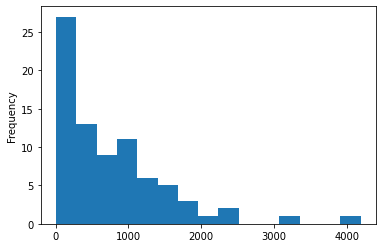

In [ ]:
neigh_group_pat['all_pat'].iloc[:-1].plot(kind='hist', bins=15)

In [ ]:
quantity = np.arange(100, 1100, 100)
y_1 = []
y_2 = []
for i in quantity:
  y_1.append(neigh_group_pat[neigh_group_pat['all_pat'] < i].iloc[:-1, 2].mean())
  y_2.append(neigh_group_pat[neigh_group_pat['all_pat'] > i].iloc[:-1, 2].mean())

Text(0, 0.5, 'отношение не прогульщиков к прогульщикам')

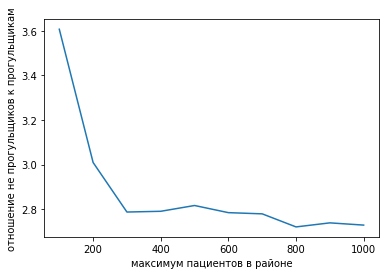

In [ ]:
plt.plot(quantity, y_1)
plt.xlabel('максимум пациентов в районе')
plt.ylabel('отношение не прогульщиков к прогульщикам')

Text(0, 0.5, 'отношение не прогульщиков к прогульщикам')

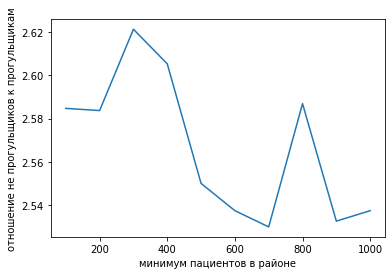

In [ ]:
plt.plot(quantity, y_2)
plt.xlabel('минимум пациентов в районе')
plt.ylabel('отношение не прогульщиков к прогульщикам')

### Задание 12
Возьмите набор данных customer churn, и сделайте корреляционный анализ средствами pandas.

1. Проверьте, есть ли скоррелированные признаки в наборе данных (corr() + heatmap)
2. Посчитайте корреляцию каждого признака с целевой переменной

https://drive.google.com/file/d/1GN5tTvVBO9xoafkyhY67NZ5k6KuzG3gP/view?usp=sharing

Целевая переменная у нас это отток: Да/нет


In [3]:
df = pd.read_csv('telecom_churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


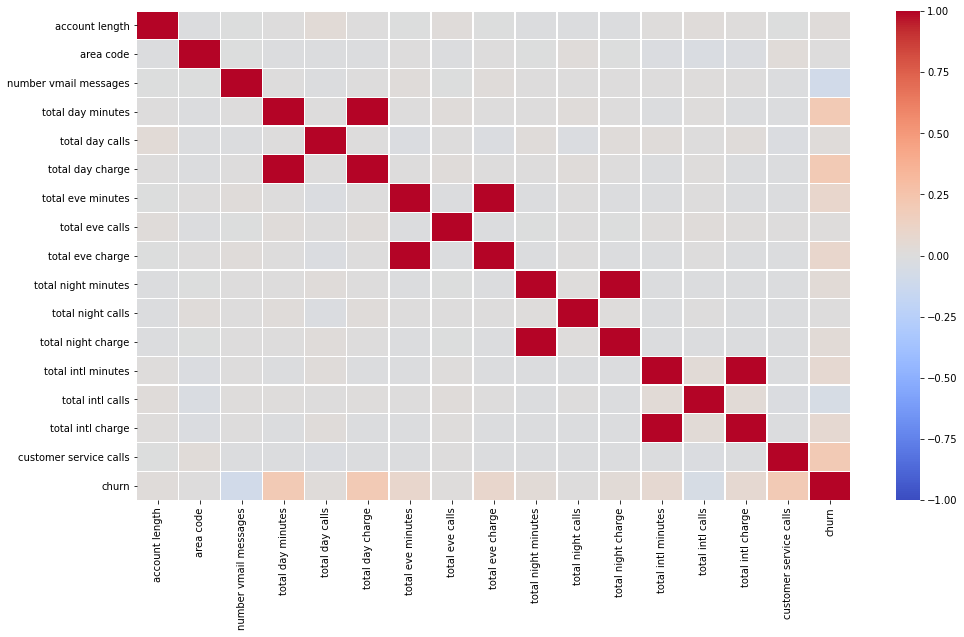

In [5]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(), linewidths=.2, vmin=-1, vmax=1, center=0, cmap='coolwarm')

In [6]:
df.iloc[:,:-1].corrwith(df.iloc[:,-1]) #корелляция churn с остальными признаками

account length            0.016541
area code                 0.006174
number vmail messages    -0.089728
total day minutes         0.205151
total day calls           0.018459
total day charge          0.205151
total eve minutes         0.092796
total eve calls           0.009233
total eve charge          0.092786
total night minutes       0.035493
total night calls         0.006141
total night charge        0.035496
total intl minutes        0.068239
total intl calls         -0.052844
total intl charge         0.068259
customer service calls    0.208750
dtype: float64

### Задание 13
Проведите когортный анализ по клиентам онлайн магазина, отобразив retention (процент клиентов в когорте в период 1-2-3- итд).


Данные для работы можно скачать [по ссылке](https://drive.google.com/file/d/1K5LLBiCZ6p_34ANiMo0rI46xMdP5ZfRT/view?usp=sharing). Это данные о продажах товаров одного интернет магазина, в данных содержится номер чека, номер товара на складе, его описание, кол-во товара в строчке чека, дата, цена за единицу, идентификатор покупателя, а также страна в которой произошла продажа.

In [2]:
data = pd.read_csv('online retail.csv', encoding='latin1')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [3]:
df = data[['InvoiceDate', 'CustomerID']].dropna()
df = df.astype({'InvoiceDate': 'Datetime64',
                'CustomerID':'Int64'})
df

,InvoiceDate,CustomerID
0,2010-12-01 08:26:00,17850
1,2010-12-01 08:26:00,17850
2,2010-12-01 08:26:00,17850
3,2010-12-01 08:26:00,17850
4,2010-12-01 08:26:00,17850
...,...,...
541904,2011-12-09 12:50:00,12680
541905,2011-12-09 12:50:00,12680
541906,2011-12-09 12:50:00,12680
541907,2011-12-09 12:50:00,12680


In [4]:
df.drop_duplicates(inplace=True)
df

,InvoiceDate,CustomerID
0,2010-12-01 08:26:00,17850
7,2010-12-01 08:28:00,17850
9,2010-12-01 08:34:00,13047
25,2010-12-01 08:35:00,13047
26,2010-12-01 08:45:00,12583
...,...,...
541865,2011-12-09 12:23:00,13777
541867,2011-12-09 12:25:00,13777
541869,2011-12-09 12:31:00,15804
541890,2011-12-09 12:49:00,13113


In [5]:
df['rank'] = df.groupby('CustomerID')['InvoiceDate'].rank()
df['month'] = df['InvoiceDate'].dt.strftime('%Y-%m')
df.drop('InvoiceDate', axis=1, inplace=True)
df

,CustomerID,rank,month
0,17850,1.0,2010-12
7,17850,2.0,2010-12
9,13047,1.0,2010-12
25,13047,2.0,2010-12
26,12583,1.0,2010-12
...,...,...,...
541865,13777,39.0,2011-12
541867,13777,40.0,2011-12
541869,15804,19.0,2011-12
541890,13113,39.0,2011-12


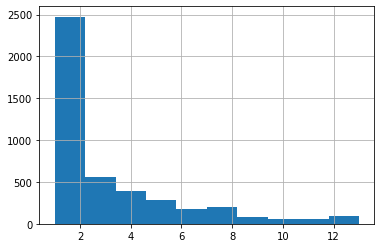

In [6]:
df.groupby('CustomerID')['month'].nunique().hist()

In [7]:
df = pd.merge(df, 
         df[df['rank'] == 1][['CustomerID', 'month']].rename(columns = {'month':'cohort_group'}),
         how='inner', on='CustomerID')
df

,CustomerID,rank,month,cohort_group
0,17850,1.0,2010-12,2010-12
1,17850,2.0,2010-12,2010-12
2,17850,3.0,2010-12,2010-12
3,17850,4.0,2010-12,2010-12
4,17850,5.0,2010-12,2010-12
...,...,...,...,...
22029,13436,1.0,2011-12,2011-12
22030,15520,1.0,2011-12,2011-12
22031,13298,1.0,2011-12,2011-12
22032,14569,1.0,2011-12,2011-12


In [8]:
df_cohort = df.groupby(['cohort_group', 'month'])[['CustomerID']].nunique().rename(columns={'CustomerID':'quantity'})
df_cohort

quantity
cohort_group month            
2010-12      2010-12       948
             2011-01       362
             2011-02       317
             2011-03       367
             2011-04       341
...                        ...
2011-10      2011-11        93
             2011-12        46
2011-11      2011-11       321
             2011-12        43
2011-12      2011-12        41

[91 rows x 1 columns]

In [9]:
df_quantity_by_cohort = df_cohort.unstack()
df_quantity_by_cohort.columns = list(np.arange(1, df_quantity_by_cohort.shape[1]+1))
df_quantity_by_cohort

,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_group,,,,,,,,,,,,,
2010-12,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01,NaN,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0
2011-02,NaN,NaN,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0
2011-03,NaN,NaN,NaN,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0
2011-04,NaN,NaN,NaN,NaN,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0
2011-05,NaN,NaN,NaN,NaN,NaN,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0
2011-06,NaN,NaN,NaN,NaN,NaN,NaN,235.0,49.0,44.0,64.0,58.0,79.0,24.0
2011-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,191.0,40.0,39.0,44.0,52.0,22.0
2011-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,167.0,42.0,42.0,42.0,23.0


In [12]:
result = df_quantity_by_cohort.divide(df_quantity_by_cohort.max(axis=1), axis=0)
result

,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_group,,,,,,,,,,,,,
2010-12,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
2011-01,NaN,1.000000,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644
2011-02,NaN,NaN,1.000000,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105
2011-03,NaN,NaN,NaN,1.000000,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636
2011-04,NaN,NaN,NaN,NaN,1.000000,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612
2011-05,NaN,NaN,NaN,NaN,NaN,1.000000,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943
2011-06,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128
2011-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.209424,0.204188,0.230366,0.272251,0.115183
2011-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.251497,0.251497,0.251497,0.137725


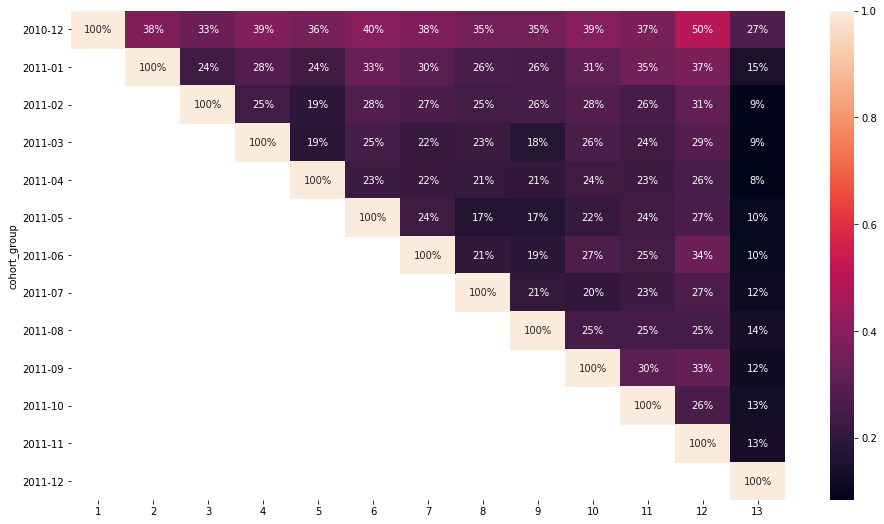

In [21]:
plt.figure(figsize=(16,9))
sns.heatmap(result, mask=result.isnull(), annot=True, fmt='.0%')